<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовим-данные" data-toc-modified-id="Подготовим-данные-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовим данные</a></span></li><li><span><a href="#Разведовательный-анализ-данных" data-toc-modified-id="Разведовательный-анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Разведовательный анализ данных</a></span><ul class="toc-item"><li><span><a href="#Психотипы" data-toc-modified-id="Психотипы-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Психотипы</a></span></li><li><span><a href="#Должности" data-toc-modified-id="Должности-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Должности</a></span></li><li><span><a href="#Сферы-профессий" data-toc-modified-id="Сферы-профессий-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Сферы профессий</a></span></li></ul></li><li><span><a href="#Построение-модели-машинного-обучения" data-toc-modified-id="Построение-модели-машинного-обучения-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Построение модели машинного обучения</a></span><ul class="toc-item"><li><span><a href="#Baseline" data-toc-modified-id="Baseline-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Baseline</a></span></li><li><span><a href="#Подбираем-гиперпараметры" data-toc-modified-id="Подбираем-гиперпараметры-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Подбираем гиперпараметры</a></span><ul class="toc-item"><li><span><a href="#Строим-модель-с-подобранными-гиперпараметрами" data-toc-modified-id="Строим-модель-с-подобранными-гиперпараметрами-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Строим модель с подобранными гиперпараметрами</a></span></li></ul></li><li><span><a href="#Подбираем-гиперпараметр-iterations" data-toc-modified-id="Подбираем-гиперпараметр-iterations-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Подбираем гиперпараметр iterations</a></span></li></ul></li><li><span><a href="#Построим-финальную-модель" data-toc-modified-id="Построим-финальную-модель-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Построим финальную модель</a></span></li><li><span><a href="#Анализ-полученных-результатов" data-toc-modified-id="Анализ-полученных-результатов-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Анализ полученных результатов</a></span></li></ul></div>

# Подготовим данные

In [156]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#from sklearn import metrics
import itertools
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import average_precision_score, classification_report, precision_recall_curve, confusion_matrix 
from sklearn.preprocessing import MultiLabelBinarizer
from hyperopt import hp, fmin, tpe
from catboost import cv
import hvplot.pandas

from astropy.visualization import astropy_mpl_style
astropy_mpl_style['axes.grid'] = False
plt.style.use(astropy_mpl_style)

In [157]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

Датасет был взят с сайта [www.kaggle.com](https://www.kaggle.com/datasets/pmenshih/kpmiru-questionnaires-data) в которых респонденты отвечали на 142, по которым был вычислен психотип по методики KPMI ([Википедия](https://en.wikipedia.org/wiki/Myers%E2%80%93Briggs_Type_Indicator))  
https://drive.google.com/file/d/1U6X4t-1w9khsYlq4HUtAGpT1qWeVJMgp/view?usp=share_link

In [231]:
#Скачиваем таблицу
!gdown 1U6X4t-1w9khsYlq4HUtAGpT1qWeVJMgp

Downloading...
From: https://drive.google.com/uc?id=1U6X4t-1w9khsYlq4HUtAGpT1qWeVJMgp
To: C:\Users\lavru\juoyter_notebook\Computed_Psychotype\kpmi_data.csv

  0%|          | 0.00/7.32M [00:00<?, ?B/s]
 14%|#4        | 1.05M/7.32M [00:00<00:00, 7.46MB/s]
 36%|###5      | 2.62M/7.32M [00:00<00:00, 9.65MB/s]
 57%|#####7    | 4.19M/7.32M [00:00<00:00, 9.87MB/s]
 79%|#######8  | 5.77M/7.32M [00:00<00:00, 10.3MB/s]
 93%|#########3| 6.82M/7.32M [00:00<00:00, 9.92MB/s]
100%|##########| 7.32M/7.32M [00:00<00:00, 10.3MB/s]


In [232]:
df = pd.read_csv('kpmi_data.csv',low_memory=False)

In [233]:
df.head(5)

,jobtitle,jobfield,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15,q16,q17,q18,q19,q20,q21,q22,q23,q24,q25,q26,q27,q28,q29,q30,q31,q32,q33,q34,q35,q36,q37,q38,q39,q40,q41,q42,q43,q44,q45,q46,q47,q48,q49,q50,q51,q52,q53,q54,q55,q56,q57,q58,q59,q60,q61,q62,q63,q64,q65,q66,q67,q68,q69,q70,q71,q72,q73,q74,q75,q76,q77,q78,q79,q80,q81,q82,q83,q84,q85,q86,q87,q88,q89,q90,q91,q92,q93,q94,q95,q96,q97,q98,q99,q100,q101,q102,q103,q104,q105,q106,q107,q108,q109,q110,q111,q112,q113,q114,q115,q116,q117,q118,q119,q120,q121,q122,q123,q124,q125,q126,q127,q128,q129,q130,q131,q132,q133,q134,q135,q136,q137,q138,q139,q140,q141,q142,scale_e,scale_i,scale_s,scale_n,scale_t,scale_f,scale_j,scale_p,psychotype,satisfied
0,NaN,NaN,1,0,0,0,0,1,1,0,1,0,1,0,1,0,0,0,0,0,1,1,1,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,1,0,0,1,1,1,0,0,0,0,1,1,1,0,1,0,1,0,0,0,1,0,1,1,0,0,1,1,1,0,0,1,1,0,0,0,1,1,0,1,1,1,1,1,1,1,1,0,1,1,0,0,1,0,0,0,1,0,0,0,1,1,0,1,0,1,0,0,1,1,1,1,1,0,0,0,1,1,1,0,0,0,0,1,0,0,1,0,0,0,5,26,25,12,24,8,27,10,ISTJ,0
1,HR manager,Staff and training,1,0,0,1,1,1,1,0,1,0,1,0,0,0,1,1,1,1,1,0,0,1,0,1,1,1,1,0,0,1,0,0,0,1,0,1,1,0,0,0,0,1,1,0,0,1,1,1,0,1,0,1,0,0,1,1,1,1,0,0,0,1,0,0,1,1,1,1,1,0,0,1,0,0,0,0,1,1,0,1,1,1,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,1,0,0,1,1,16,22,17,16,23,11,22,15,ISTJ,1
2,HR manager,Staff and training,0,0,1,0,0,1,1,0,0,1,1,0,0,1,1,0,1,0,1,0,0,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,1,1,1,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,0,1,0,1,1,1,1,1,1,0,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,1,0,1,1,0,0,1,1,0,0,0,1,28,6,14,18,20,16,20,15,ENTJ,0
3,HR manager,Staff and training,0,0,1,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0,1,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1,1,1,0,1,0,0,1,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,1,1,0,1,0,0,0,1,1,0,1,28,10,22,10,16,14,22,12,ESTJ,1
4,HR manager,Staff and training,0,0,0,0,0,1,1,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,1,1,1,0,1,1,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,0,1,0,1,0,1,1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,1,1,1,0,1,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,1,0,0,0,1,0,0,1,1,1,1,0,0,0,24,10,16,17,13,23,31,3,ENFJ,0


# Разведовательный анализ данных

In [160]:
df.shape

(21846, 154)

В таблице 154 столбца и 21846 строк

In [161]:
df.isna().mean().sort_values(ascending = False).head(5)

jobtitle    0.422274
jobfield    0.382084
q78         0.000000
q97         0.000000
q99         0.000000
dtype: float64

Данные пропущены только в столбцах jobtitle и jobfield

Посмотрим на кол-во человек, которые удовлетворены своей работой 

In [162]:
df['satisfied'].value_counts()

1    14683
0     7163
Name: satisfied, dtype: int64

Большое кол-во репондентов удовлетворены своей работой (14683). Посмотрим на психотипы для каждой подвыборки

## Психотипы

In [163]:
good_job = df[df['satisfied'] == 1]['psychotype'].value_counts().reset_index()

In [164]:
good_job['all_count'] = np.sum(good_job['psychotype'])

In [165]:
good_job['pct_psychotype'] = good_job['psychotype'] /  good_job['all_count']

In [166]:
good_job.head(5)

,index,psychotype,all_count,pct_psychotype
0,ESTJ,5161,14683,0.351495
1,ISTJ,2189,14683,0.149084
2,ENTJ,1305,14683,0.088878
3,ESFJ,1090,14683,0.074236
4,ENTP,768,14683,0.052305


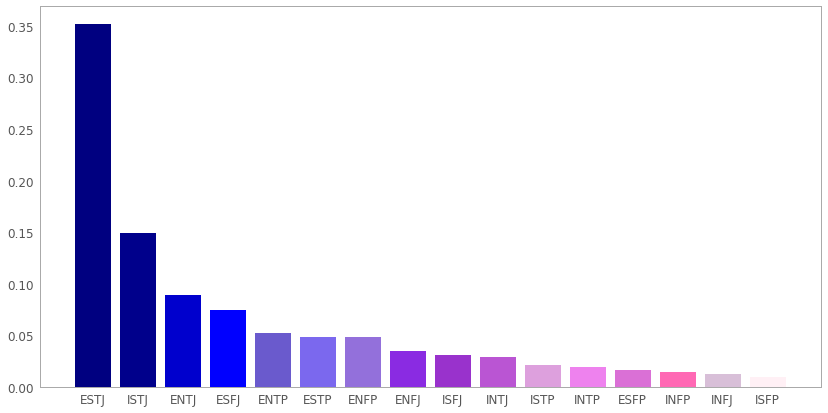

In [167]:
fig, axs = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(14)
colors = ['navy', 'darkblue','mediumblue','blue','slateblue',"mediumslateblue",
          "mediumpurple", "blueviolet", 'darkorchid','mediumorchid','plum','violet',
         'orchid','hotpink','thistle','lavenderblush']
axs.bar(good_job['index'], good_job['pct_psychotype'], color = colors)

plt.show()

На графике видно, что у людей удовлетворенных своей работой в топ 5 входят следующие психотипы: ESTJ, ISTJ, ENTJ, ESFJ, ENTP

In [168]:
bad_job = df[df['satisfied'] == 0]['psychotype'].value_counts().reset_index()

In [169]:
bad_job['all_count'] = np.sum(bad_job['psychotype'])

In [170]:
bad_job['pct_psychotype'] = bad_job['psychotype'] /  bad_job['all_count']

In [171]:
bad_job.head(5)

,index,psychotype,all_count,pct_psychotype
0,ESTJ,1303,7163,0.181907
1,ISTJ,1188,7163,0.165852
2,ENTJ,493,7163,0.068826
3,ENTP,461,7163,0.064359
4,ESFJ,458,7163,0.063940


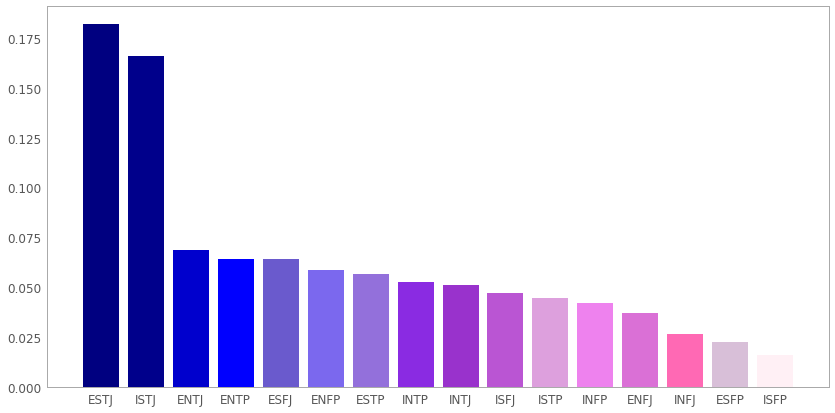

In [172]:
fig, axs = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(14)
colors = ['navy', 'darkblue','mediumblue','blue','slateblue',"mediumslateblue",
          "mediumpurple", "blueviolet", 'darkorchid','mediumorchid','plum','violet',
         'orchid','hotpink','thistle','lavenderblush']
axs.bar(bad_job['index'], bad_job['pct_psychotype'], color = colors)

plt.show()

У людей, которые **не** удовлетворенны своей работой, есть различия. Психотип ISTJ почти сравнялся с ESTJ, также на четвертом месте стоит психотип ENTP, вместо ESFJ. Топ 5 психотипов: ESTJ, ISTJ, ENTJ, ENTP, ESFJ

## Должности

Посмотрим на должности занимаемыми респондентами

<AxesSubplot:xlabel='count', ylabel='jobtitle'>

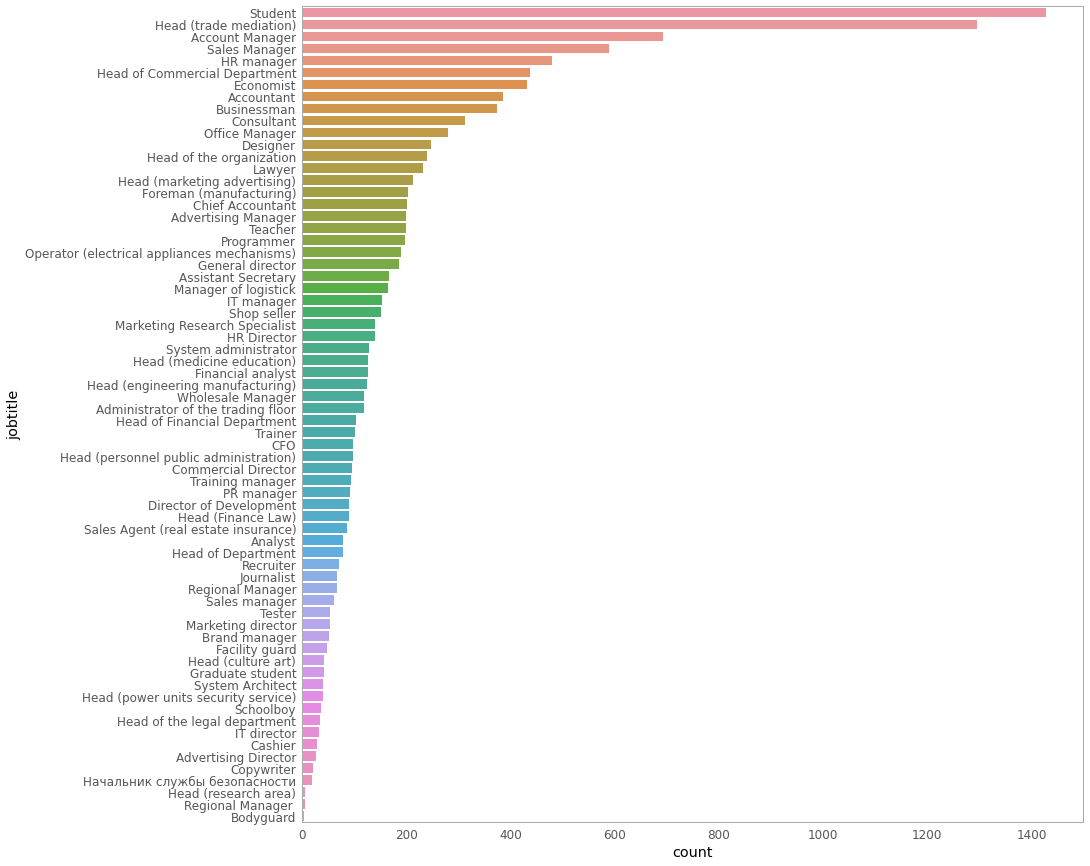

In [173]:
figure(figsize=(14, 15))
sns.countplot(y= 'jobtitle',
              data=df,
              order = df['jobtitle'].value_counts().index)

In [174]:
df['jobtitle'].value_counts().head(5)

Student                   1428
Head (trade mediation)    1296
Account Manager            693
Sales Manager              588
HR manager                 480
Name: jobtitle, dtype: int64

В данном датасете представлено большое разнообразия различных должностей. Посмотрим на удовлетворенность работой в зависимости от должности

In [175]:
all_job = df['jobtitle'].value_counts().reset_index()

In [176]:
all_job['qcut'] = pd.qcut(all_job['jobtitle'], q = 3, labels = ['Bottom', 'Median', 'Top'])

In [177]:
job_gb = df.groupby(['jobtitle','satisfied'])['satisfied'].agg(['count']).reset_index()

In [178]:
job_gb = job_gb.reset_index()

In [179]:
all_job = all_job.merge(job_gb[['satisfied','jobtitle','count']], how = 'left', left_on = 'index', right_on = 'jobtitle')

In [180]:
all_job['pct'] = all_job['count'] / all_job['jobtitle_x']

In [181]:
all_job.head(10)

,index,jobtitle_x,qcut,satisfied,jobtitle_y,count,pct
0,Student,1428,Top,0,Student,766,0.536415
1,Student,1428,Top,1,Student,662,0.463585
2,Head (trade mediation),1296,Top,0,Head (trade mediation),215,0.165895
3,Head (trade mediation),1296,Top,1,Head (trade mediation),1081,0.834105
4,Account Manager,693,Top,0,Account Manager,260,0.375180
5,Account Manager,693,Top,1,Account Manager,433,0.624820
6,Sales Manager,588,Top,0,Sales Manager,183,0.311224
7,Sales Manager,588,Top,1,Sales Manager,405,0.688776
8,HR manager,480,Top,0,HR manager,149,0.310417
9,HR manager,480,Top,1,HR manager,331,0.689583


In [182]:
all_job[(all_job['satisfied'] == 1) & (all_job['count'] > 50)][['index','pct','count']]\
.sort_values(by = 'pct', ascending = False).head(10)

,index,pct,count
59,Head (medicine education),0.889764,113
55,HR Director,0.884892,123
77,Commercial Director,0.875000,84
29,Head (marketing advertising),0.844340,179
25,Head of the organization,0.837500,201
3,Head (trade mediation),0.834105,1081
79,Training manager,0.827957,77
75,Head (personnel public administration),0.826531,81
83,Director of Development,0.822222,74
43,General director,0.816216,151


Получили должности с самым большим соотношением удовлетворенности, в  основном это руководящие должности. Также я сделал фильтр по кол-во наблюдений для получения более уверенных выводов

In [183]:
all_job[(all_job['satisfied'] == 0) & (all_job['count'] > 50)][['index','pct','count']]\
.sort_values(by = 'pct', ascending = False).head(10)

,index,pct,count
0,Student,0.536415,766
40,Operator (electrical appliances mechanisms),0.534392,101
50,Shop seller,0.496689,75
20,Office Manager,0.496429,139
12,Economist,0.481481,208
64,Wholesale Manager,0.428571,51
44,Assistant Secretary,0.409639,68
56,System administrator,0.403101,52
26,Lawyer,0.396552,92
4,Account Manager,0.375180,260


Должности с самым маленьким процентом удовлетворенности в основном это менеджеры, также на первом месте стоят студенты

Посмотрим среднюю удовлетворенность по процентилям по кол-во наблюдений

In [184]:
all_job[(all_job['qcut'] == 'Top') & (all_job['count'] > 50)].groupby('satisfied', as_index = False)['pct'].mean()

,satisfied,pct
0,0,0.346668
1,1,0.681897


In [185]:
all_job[(all_job['qcut'] == 'Median') & (all_job['count'] > 50)].groupby('satisfied', as_index = False)['pct'].mean()

,satisfied,pct
0,0,0.412883
1,1,0.736213


In [186]:
all_job[(all_job['qcut'] == 'Bottom') & (all_job['count'] > 50)].groupby('satisfied', as_index = False)['pct'].mean()

,satisfied,pct
0,1,0.731582


Здесь, я разделил професси на 3 категории по кол-во наблюдений (Top, Median, Bottom), как мы видим удовлетворенность своей работой меньше у категорий, где больше всего наблюдений, это связано с тем, что кол-во людей в должностях менеджеров, студентов и других проффессий, в которых удовлетворенность не такая большая, гораздо больше, чем людей, которые знаимают руководящие должности

## Сферы профессий

Посмотрим на каждую сферу профессий, которые представлены в датасете

<AxesSubplot:xlabel='count', ylabel='jobfield'>

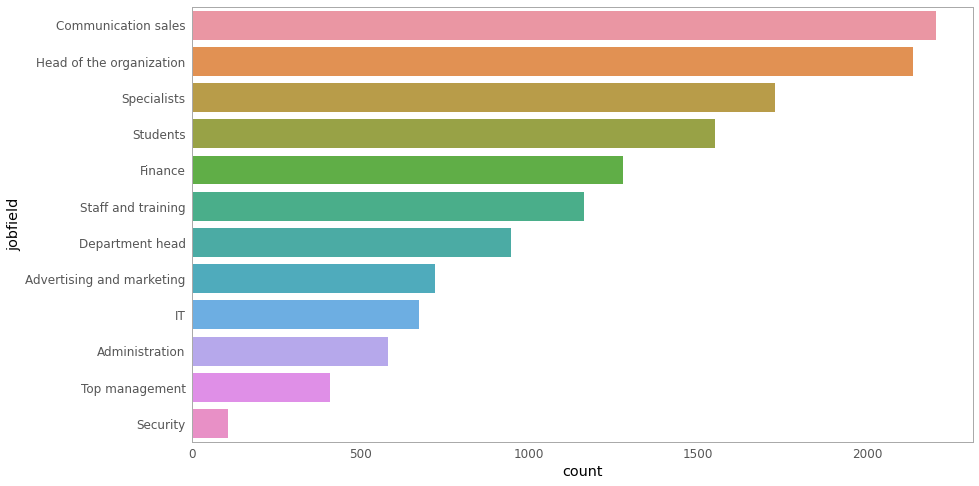

In [187]:
figure(figsize=(14, 8))
sns.countplot(y= 'jobfield',
              data=df,
              order = df['jobfield'].value_counts().index)

Самые распространенные сферы

In [188]:
branch = df.groupby('jobfield')['satisfied'].mean().sort_values(ascending = False).reset_index()

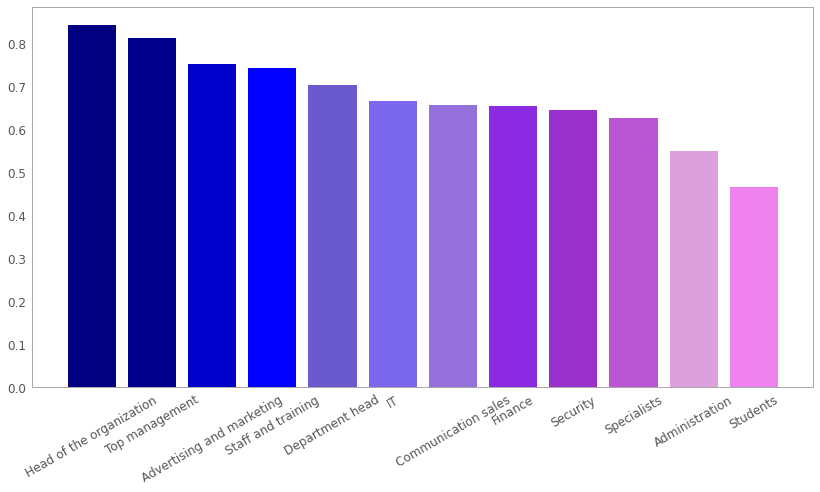

In [189]:
fig, axs = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(14)
colors = ['navy', 'darkblue','mediumblue','blue','slateblue',"mediumslateblue",
          "mediumpurple", "blueviolet", 'darkorchid','mediumorchid','plum','violet',
         'orchid','hotpink','thistle','lavenderblush']
axs.bar(branch['jobfield'], branch['satisfied'], color = colors)
plt.xticks(rotation=30)
plt.show()

Топ менеджмент и руководящие позиции имеют самую большую удовлетворенность работой. На последних местах стоят студенты и администрирование

# Построение модели машинного обучения

## Baseline

Для нашей модели мы уберем параметры jobtitle, jobfield, все scale_  т.к.
1. Данные заполнены не полностью 
2. Данные вопросы не входят в наш психологический тест

In [190]:
df_pred = df.iloc[:,2:]

In [191]:
df_pred = df_pred.drop(['scale_e','scale_i', 'scale_s', 'scale_n', 'scale_t', 'scale_f', 'scale_j', 'scale_p','satisfied'], axis = 1)

In [192]:
X_train, X_test, y_train, y_test = train_test_split(df_pred.iloc[:,:-1], df_pred.iloc[:,-1], 
                                                    test_size=0.2,random_state=42, stratify = df['psychotype'])
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, train_size=0.5, 
                                                random_state=42, stratify = y_test)

In [193]:
X = list(df_pred.iloc[:,:-1].columns)
y = 'psychotype'

In [194]:
from catboost import Pool

train_data = Pool(data=X_train,
                  label=y_train
                 )
val_data = Pool(data = X_val,
               label = y_val)


In [195]:
params = {'verbose' : 100,
          'random_seed':42,
          "loss_function" : 'MultiClass'}

In [196]:
model = CatBoostClassifier(**params)

In [197]:
model.fit(train_data, eval_set = val_data)

Learning rate set to 0.114334
0:	learn: 2.4385515	test: 2.4459179	best: 2.4459179 (0)	total: 115ms	remaining: 1m 54s
100:	learn: 0.5654285	test: 0.7651063	best: 0.7651063 (100)	total: 12.2s	remaining: 1m 48s
200:	learn: 0.3144555	test: 0.6040217	best: 0.6040217 (200)	total: 23.9s	remaining: 1m 35s
300:	learn: 0.2009148	test: 0.5366292	best: 0.5366292 (300)	total: 35.6s	remaining: 1m 22s
400:	learn: 0.1388391	test: 0.4995225	best: 0.4995225 (400)	total: 47.3s	remaining: 1m 10s
500:	learn: 0.1014145	test: 0.4763464	best: 0.4762563 (499)	total: 1m	remaining: 1m
600:	learn: 0.0775247	test: 0.4600090	best: 0.4600090 (600)	total: 1m 13s	remaining: 48.5s
700:	learn: 0.0611191	test: 0.4485247	best: 0.4485247 (700)	total: 1m 24s	remaining: 36.2s
800:	learn: 0.0493705	test: 0.4386409	best: 0.4386409 (800)	total: 1m 37s	remaining: 24.2s
900:	learn: 0.0408594	test: 0.4316270	best: 0.4316270 (900)	total: 1m 53s	remaining: 12.4s
999:	learn: 0.0344848	test: 0.4267941	best: 0.4267941 (999)	total: 2m 5

In [198]:
"""
Данная функция высчитывает метрику average_precision_score
по методу One vs Rest (OvR)
"""
def average_precision_score_multiclass(actual_class, pred_class, average = "macro"):
    
    unique_class = set(actual_class)
    avg_precision_score_dict = {}
    for per_class in unique_class:
     
        other_class = [x for x in unique_class if x != per_class]


        new_actual_class = [0 if x in other_class else 1 for x in actual_class]
        new_pred_class = [0 if x in other_class else 1 for x in pred_class]

    
        avg_precision_score = average_precision_score(new_actual_class, new_pred_class, average = average)
        avg_precision_score_dict[per_class] = avg_precision_score
    return avg_precision_score_dict

In [199]:
test_pred = model.predict(X_test)

In [200]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

        ENFJ       0.75      0.63      0.69        78
        ENFP       0.83      0.89      0.86       113
        ENTJ       0.83      0.80      0.82       180
        ENTP       0.86      0.87      0.87       123
        ESFJ       0.80      0.85      0.82       155
        ESFP       0.77      0.57      0.66        40
        ESTJ       0.89      0.96      0.92       646
        ESTP       0.87      0.75      0.80       112
        INFJ       0.77      0.61      0.68        38
        INFP       0.80      0.80      0.80        51
        INTJ       0.82      0.76      0.79        79
        INTP       0.85      0.85      0.85        66
        ISFJ       0.83      0.68      0.75        78
        ISFP       0.76      0.64      0.70        25
        ISTJ       0.87      0.93      0.90       338
        ISTP       0.85      0.65      0.74        63

    accuracy                           0.85      2185
   macro avg       0.82   

Метрика Accuracy показывает общий процент правильных предсказаний (TP и TN) в нашем случаем модель правильно предсказывает классы в 85% (однако данная метрика не учитывает несбалансированность классов)  
Метрика precision (macro) показывает процент правильных предсказаний класса среди всех предсказанных классов в среднем по всем классам. Она равна 82%. Для моей модели *важно*, что были *верно* предсказаны классы, поэтому для нас это метрика ключевая  
Метрика f1 (macro avg) показывает гармоническое среднее между precision и recall. На эту метрику будем обращать внимание

In [201]:
dict(sorted(average_precision_score_multiclass(y_test, test_pred).items(), key=lambda item: item[1]))

{'ESFP': 0.4486136536994661,
 'INFJ': 0.4709000762776506,
 'ENFJ': 0.4868423309366805,
 'ISFP': 0.4917380407540591,
 'ISTP': 0.5659548932718269,
 'ISFJ': 0.5741419681100745,
 'INTJ': 0.6329370255049344,
 'INFP': 0.650866547543323,
 'ESTP': 0.6622991813913988,
 'ENTJ': 0.6823719262972713,
 'ESFJ': 0.69022403710599,
 'INTP': 0.724503197147258,
 'ENFP': 0.7515608857490442,
 'ENTP': 0.75797830618005,
 'ISTJ': 0.8145766594119157,
 'ESTJ': 0.864553075629368}

Показывает предсказание метрики average_precision_score для каждого класса против всех остальных (OvR)  
Худшие значения видим для классов ESFP, INFJ, ENFJ, ISFP

In [202]:
np.mean(list(average_precision_score_multiclass(y_test, test_pred).values()))

0.6418788628131444

Среднее значение average_precision_score по всем классам = 0.641

## Подбираем гиперпараметры

Будем настраивать только основные гиперпараметры и обрабатывать их кросс-валидацией с 5 folds (можно было бы протестировать больше кол-во параметров и использовать большее кол-во фолдов от 5 - 10 для более точной оценки нашей метрики, однако вычислительные способности компьютера этого не позволяют)  
Следующие вычисления проводятся очень долго:

In [89]:
space = {
    "iterations": 300,
    "loss_function": "MultiClass",
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.5),
    'depth': hp.randint('depth', 3, 15),
    'l2_leaf_reg': hp.randint('l2_leaf_reg', 1, 15),
    'boosting_type': 'Plain'
}

In [595]:
X_train_val = pd.concat([X_train,X_val],axis = 0)

In [596]:
y_train_val = pd.concat([y_train,y_val],axis = 0)

In [597]:
train_val_data = Pool(data=X_train_val,
                  label=y_train_val
                 )

In [86]:
def hyperopt_objective(params):
    cv_data = cv(
    params = params,
    pool = train_val_data,
    fold_count=5,
    shuffle=True,
    partition_random_seed=0,
    stratified= True, # мб из за этого так долго
    verbose= False,
    early_stopping_rounds=10
    )
    
    loss = cv_data['test-MultiClass-mean'].min()
    return loss

In [90]:
best = fmin(hyperopt_objective,
    space=space,
    algo=tpe.suggest,
    max_evals=25)

  0%|          | 0/25 [00:00<?, ?trial/s, best loss=?]Training on fold [0/5]

bestTest = 0.7432208237
bestIteration = 299

Training on fold [1/5]

bestTest = 0.7265813542
bestIteration = 299

Training on fold [2/5]

bestTest = 0.6967202564
bestIteration = 299

Training on fold [3/5]

bestTest = 0.7311595251
bestIteration = 299

Training on fold [4/5]

bestTest = 0.7167413141
bestIteration = 299

  4%|▍         | 1/25 [34:18<13:43:22, 2058.43s/trial, best loss: 0.7228846546933776]Training on fold [0/5]

bestTest = 0.4452952165
bestIteration = 299

Training on fold [1/5]

bestTest = 0.4306178179
bestIteration = 299

Training on fold [2/5]

bestTest = 0.4284821099
bestIteration = 299

Training on fold [3/5]

bestTest = 0.4397629472
bestIteration = 299

Training on fold [4/5]

bestTest = 0.4307830853
bestIteration = 299

  8%|▊         | 2/25 [35:27<5:40:31, 888.35s/trial, best loss: 0.4349882353749348]  Training on fold [0/5]

bestTest = 0.5450836712
bestIteration = 299

Training on fold 

Получили лучше гиперпараметры

In [91]:
best

{'depth': 3, 'l2_leaf_reg': 1, 'learning_rate': 0.4629992499592749}

### Строим модель с подобранными гиперпараметрами

In [203]:
params = {'verbose' : 100,
          'random_seed':42,
          'depth': 3, 
          'l2_leaf_reg': 1, 
          'learning_rate': 0.4629992499592749,
          "loss_function" : 'MultiClass'}

In [204]:
model = CatBoostClassifier(**params)

In [205]:
model.fit(train_data, eval_set = val_data)

0:	learn: 2.1384663	test: 2.1589716	best: 2.1589716 (0)	total: 39.1ms	remaining: 39s
100:	learn: 0.3701751	test: 0.5016964	best: 0.5016964 (100)	total: 2.92s	remaining: 26s
200:	learn: 0.2116894	test: 0.3934646	best: 0.3934646 (200)	total: 5.7s	remaining: 22.6s
300:	learn: 0.1375768	test: 0.3586977	best: 0.3586977 (300)	total: 8.8s	remaining: 20.4s
400:	learn: 0.0943483	test: 0.3403919	best: 0.3393836 (397)	total: 12.2s	remaining: 18.2s
500:	learn: 0.0675135	test: 0.3301319	best: 0.3290468 (482)	total: 15.4s	remaining: 15.3s
600:	learn: 0.0496027	test: 0.3218238	best: 0.3209959 (587)	total: 18.3s	remaining: 12.1s
700:	learn: 0.0374086	test: 0.3171738	best: 0.3165601 (695)	total: 21.2s	remaining: 9.05s
800:	learn: 0.0286979	test: 0.3131929	best: 0.3125423 (777)	total: 24.9s	remaining: 6.19s
900:	learn: 0.0222833	test: 0.3122034	best: 0.3119133 (897)	total: 28.3s	remaining: 3.11s
999:	learn: 0.0176233	test: 0.3121466	best: 0.3099025 (955)	total: 31.2s	remaining: 0us

bestTest = 0.3099025

In [206]:
test_pred = model.predict(X_test)

In [207]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

        ENFJ       0.83      0.74      0.78        78
        ENFP       0.88      0.88      0.88       113
        ENTJ       0.89      0.86      0.87       180
        ENTP       0.91      0.92      0.91       123
        ESFJ       0.87      0.91      0.89       155
        ESFP       0.89      0.82      0.86        40
        ESTJ       0.92      0.96      0.94       646
        ESTP       0.90      0.86      0.88       112
        INFJ       0.78      0.74      0.76        38
        INFP       0.79      0.82      0.81        51
        INTJ       0.74      0.77      0.76        79
        INTP       0.92      0.85      0.88        66
        ISFJ       0.87      0.79      0.83        78
        ISFP       0.68      0.68      0.68        25
        ISTJ       0.91      0.92      0.92       338
        ISTP       0.86      0.78      0.82        63

    accuracy                           0.89      2185
   macro avg       0.85   

Метрика accuracy увеличилась на 4%  
Метрика f1 увеличилась на 5%  
Метрика precision увеличилась на 3%  

In [208]:
dict(sorted(average_precision_score_multiclass(y_test, test_pred).items(), key=lambda item: item[1]))

{'ISFP': 0.46606132723112137,
 'INFJ': 0.5776760742435799,
 'INTJ': 0.5826436670356914,
 'ENFJ': 0.6252705341950193,
 'INFP': 0.6567272062315708,
 'ISTP': 0.6750233070599203,
 'ISFJ': 0.701436052800993,
 'ESFP': 0.739014472138042,
 'ENTJ': 0.7741400602956667,
 'ESTP': 0.7763480216184507,
 'ENFP': 0.7808226197467505,
 'INTP': 0.7835135691233527,
 'ESFJ': 0.7981635950558958,
 'ENTP': 0.8417783375072991,
 'ISTJ': 0.8540045766590388,
 'ESTJ': 0.8987047376866627}

In [209]:
np.mean(list(average_precision_score_multiclass(y_test, test_pred).values()))

0.7207080099143159

Получили увеличение метрики average_precision_score на 8%

## Подбираем гиперпараметр iterations

In [63]:
from sklearn.metrics import f1_score

In [85]:
def best_iterations(iter, n):   
    params = {'verbose' : False,
              'random_seed':42,
              'depth': 3, 
              'l2_leaf_reg': 1, 
              'learning_rate': 0.4629992499592749,
              "loss_function" : 'MultiClass'}
    model = CatBoostClassifier(**params, iterations = iter)
    model.fit(train_data, eval_set = val_data)
    test_pred = model.predict(X_test)
    f1 = f1_score(y_test, test_pred, average='macro')
    avg_prec_score = np.mean(list(average_precision_score_multiclass(y_test, test_pred).values()))
    print(f'Модель номер: {n}')
    print(f'Результаты метрики f1: {round(f1,5)} при {iter} итераций')
    print(f'Результаты метрики average_precision_score: {round(avg_prec_score,5)} при {iter} итераций')
    print()

In [88]:
from tqdm import tqdm

In [90]:
n = 1
for i in tqdm(range(1000,3001,250)):
    best_iterations(i, n)
    n += 1

 11%|█         | 1/9 [00:49<06:38, 49.79s/it]

Модель номер: 1
Результаты метрики f1: 0.84173 при 1000 итераций
Результаты метрики average_precision_score: 0.72071 при 1000 итераций



 22%|██▏       | 2/9 [01:50<06:31, 55.98s/it]

Модель номер: 2
Результаты метрики f1: 0.84173 при 1250 итераций
Результаты метрики average_precision_score: 0.72071 при 1250 итераций



 33%|███▎      | 3/9 [03:05<06:28, 64.72s/it]

Модель номер: 3
Результаты метрики f1: 0.84173 при 1500 итераций
Результаты метрики average_precision_score: 0.72071 при 1500 итераций



 44%|████▍     | 4/9 [04:16<05:37, 67.43s/it]

Модель номер: 4
Результаты метрики f1: 0.84173 при 1750 итераций
Результаты метрики average_precision_score: 0.72071 при 1750 итераций



 56%|█████▌    | 5/9 [05:18<04:22, 65.50s/it]

Модель номер: 5
Результаты метрики f1: 0.84173 при 2000 итераций
Результаты метрики average_precision_score: 0.72071 при 2000 итераций



 67%|██████▋   | 6/9 [06:26<03:18, 66.16s/it]

Модель номер: 6
Результаты метрики f1: 0.84173 при 2250 итераций
Результаты метрики average_precision_score: 0.72071 при 2250 итераций



 78%|███████▊  | 7/9 [07:40<02:17, 68.77s/it]

Модель номер: 7
Результаты метрики f1: 0.84173 при 2500 итераций
Результаты метрики average_precision_score: 0.72071 при 2500 итераций



 89%|████████▉ | 8/9 [09:07<01:14, 74.57s/it]

Модель номер: 8
Результаты метрики f1: 0.84173 при 2750 итераций
Результаты метрики average_precision_score: 0.72071 при 2750 итераций



100%|██████████| 9/9 [10:51<00:00, 72.41s/it]

Модель номер: 9
Результаты метрики f1: 0.84173 при 3000 итераций
Результаты метрики average_precision_score: 0.72071 при 3000 итераций



Наша модель не становится лучше от увеличения кол-во итераций. Оставим iterations = 1000

Также мы не будем проводить кросс-валидацию отдельно, т.к. сделали это во время нахождения гиперпараметров

# Построим финальную модель

Обучим модель на большей выборки train_val_data

In [210]:
params = {'verbose' : 200,
              'random_seed':42,
              'depth': 3, 
              'l2_leaf_reg': 1, 
              'learning_rate': 0.4629992499592749,
              "loss_function" : 'MultiClass'}

In [211]:
model = CatBoostClassifier(**params)

In [212]:
X_train_val = pd.concat([X_train,X_val],axis = 0)

In [213]:
y_train_val = pd.concat([y_train,y_val],axis = 0)

In [214]:
train_val_data = Pool(data=X_train_val,
                  label=y_train_val
                 )

In [215]:
model.fit(train_val_data, eval_set = val_data)

0:	learn: 2.1411788	test: 2.1567353	best: 2.1567353 (0)	total: 40.8ms	remaining: 40.7s
200:	learn: 0.2208666	test: 0.2216639	best: 0.2216639 (200)	total: 6.8s	remaining: 27s
400:	learn: 0.1017922	test: 0.1025565	best: 0.1025565 (400)	total: 13.1s	remaining: 19.5s
600:	learn: 0.0548451	test: 0.0542609	best: 0.0542609 (600)	total: 19.5s	remaining: 13s
800:	learn: 0.0324638	test: 0.0325135	best: 0.0325135 (800)	total: 25.6s	remaining: 6.35s
999:	learn: 0.0202728	test: 0.0201324	best: 0.0201324 (999)	total: 32.2s	remaining: 0us

bestTest = 0.02013239
bestIteration = 999



In [216]:
test_pred = model.predict(X_test)

In [217]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

        ENFJ       0.85      0.81      0.83        78
        ENFP       0.90      0.90      0.90       113
        ENTJ       0.89      0.88      0.89       180
        ENTP       0.91      0.93      0.92       123
        ESFJ       0.87      0.86      0.87       155
        ESFP       0.89      0.82      0.86        40
        ESTJ       0.93      0.97      0.95       646
        ESTP       0.96      0.84      0.90       112
        INFJ       0.75      0.63      0.69        38
        INFP       0.85      0.86      0.85        51
        INTJ       0.79      0.81      0.80        79
        INTP       0.92      0.86      0.89        66
        ISFJ       0.86      0.81      0.83        78
        ISFP       0.78      0.84      0.81        25
        ISTJ       0.92      0.94      0.93       338
        ISTP       0.85      0.83      0.84        63

    accuracy                           0.90      2185
   macro avg       0.87   

 accuracy увеличилась на 1%  
 f1 на 2%  
 precision на 2%

In [218]:
dict(sorted(average_precision_score_multiclass(y_test, test_pred).items(), key=lambda item: item[1]))

{'INFJ': 0.480091533180778,
 'INTJ': 0.6469650041857942,
 'ISFP': 0.6551639969488939,
 'ENFJ': 0.69449492618829,
 'ISFJ': 0.7039145143750015,
 'ISTP': 0.7086512908548396,
 'INFP': 0.7332187442834907,
 'ESFP': 0.739014472138042,
 'ESFJ': 0.76185229106171,
 'ENTJ': 0.7936216944555773,
 'INTP': 0.7981072629297328,
 'ESTP': 0.8132671407889733,
 'ENFP': 0.819820134324889,
 'ENTP': 0.8502780611149955,
 'ISTJ': 0.8713638353666517,
 'ESTJ': 0.9070169028709884}

In [219]:
np.mean(list(average_precision_score_multiclass(y_test, test_pred).values()))

0.7485526128167905

average_precision_score увеличился на 2%

# Анализ полученных результатов

In [220]:
test_pred = model.predict(X_test)

In [221]:
test_proba = model.predict_proba(X_test)

In [222]:
"""
Находим precision для каждого порога recall
и сохраняем в словарь metrics_class_dict
"""
one_hot = MultiLabelBinarizer()
One_Hot_labels = pd.DataFrame(one_hot.fit_transform(test_pred), columns = one_hot.classes_)
#кодируем переменные по One_Hot_Encoding

precision = dict()
recall = dict()
i = 0

metrics_class_dict = {}
for class_per in one_hot.classes_:
    
    class_test = np.array(One_Hot_labels[class_per])
    
    prob_array = np.array([])
    for k in range(len(test_proba)):
        prob_array = np.append(prob_array, test_proba[k][i])
    
    precision, recall, _ = precision_recall_curve(class_test, prob_array)
    metrics_class_dict[class_per] = precision, recall
    i += 1

In [223]:
"""
обработаем полученный словарь metrics_class_dict
создадим таблицу, где в колонках будут отображаться метрики precision и recall для каждого класса
"""
data_metrics = pd.DataFrame(columns=['name_class','precision', 'recall'])
for key, value in metrics_class_dict.items():
    precision = value[0]
    recall = value[1]
    df = pd.DataFrame({'name_class': key, 'precision' : precision, 'recall' : recall})
    data_metrics = pd.concat([data_metrics,df])

In [224]:
data_metrics.hvplot.step(x='recall', y='precision', by = 'name_class', width=900, height=500)

:NdOverlay   [name_class]
   :Curve   [recall]   (precision)

График precision_recall_curve показывает изменение значения precision от порога recall  
На графике видно, что площадь под графиком меньше всего у классов INFJ, ISFP данные классы сильно отбиваются от остальной группы. В данных классах небольшое кол-во наблюдений (самое наименьшее) из-за чего снижается показатель метрики average_precision_score (площадь под графиком)

In [225]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.figure(figsize=(12,12))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

accuracy:   0.899
Confusion matrix, without normalization


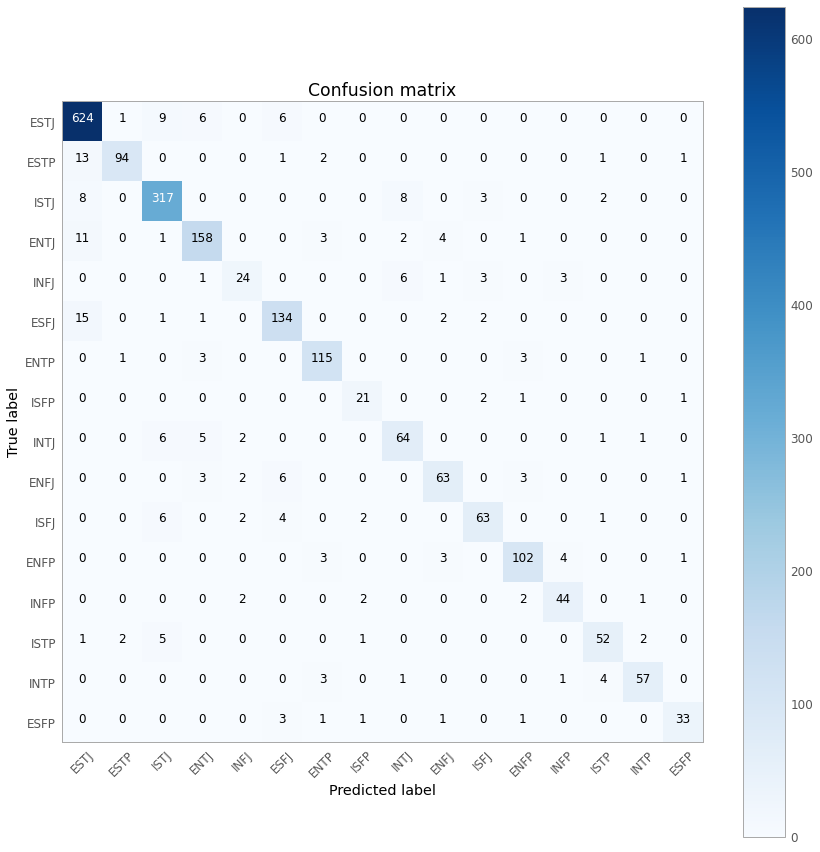

In [226]:
score = metrics.accuracy_score(y_test, test_pred)
print("accuracy:   %0.3f" % score)

cm = metrics.confusion_matrix(y_test, test_pred, labels = list(y_test.unique()))
plot_confusion_matrix(cm, classes= list(y_test.unique()))

Построили матрицу ошибок, на которой можно увидить значения TP, FP, FN, TN для каждого класса  
Также для каждого класса можно сказать, как предсказала значения классов наша модель

In [227]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

        ENFJ       0.85      0.81      0.83        78
        ENFP       0.90      0.90      0.90       113
        ENTJ       0.89      0.88      0.89       180
        ENTP       0.91      0.93      0.92       123
        ESFJ       0.87      0.86      0.87       155
        ESFP       0.89      0.82      0.86        40
        ESTJ       0.93      0.97      0.95       646
        ESTP       0.96      0.84      0.90       112
        INFJ       0.75      0.63      0.69        38
        INFP       0.85      0.86      0.85        51
        INTJ       0.79      0.81      0.80        79
        INTP       0.92      0.86      0.89        66
        ISFJ       0.86      0.81      0.83        78
        ISFP       0.78      0.84      0.81        25
        ISTJ       0.92      0.94      0.93       338
        ISTP       0.85      0.83      0.84        63

    accuracy                           0.90      2185
   macro avg       0.87   

В итоге получаем среднее значение для нашей ключевой метрики precision = 0.87 (процент правильных предсказанных 1 среди всех предсказанных единичек)